   <h3 align="center"><b> MACHINE LEARNING MODEL FOR PREDICTING MEDICAL INSURANCE COST</b></h3>


**PROBLEM STATEMENT:**

Hospital ABC, a leading healthcare provider, aims to optimize its resource allocation and improve
patient care by understanding the factors influencing medical costs for its patients. To achieve
this, Hospital ABC has collected a comprehensive dataset containing information about patients'
demographics, lifestyle, health status, and medical expenses etc.The dataset includes attributes
such as age, gender, BMI, smoking status, region, as well as additional information like
occupation, exercise frequency, chronic conditions, and more.
How can we predict medical costs for patients based on demographic factors, lifestyle-related
information, health status, insurance plan type, family medical history, distance to the nearest
hospital, and primary care physician visits?

**AIM**:

   1)To  build a regression  model to predict medical costs for patients based on demographic factors,
       lifestyle-related information, health status, insurance plan type,
      family medical history, distance to the nearest hospital, primary care physician visits and other features.

   2)To provide actionable insights for Hospital ABC to improve resource
      allocation, healthcare planning, and patient support services, ultimately enhancing the quality and accessibility of healthcare services for its patients.

In [1]:
##import  libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
##load dataset
df=pd.read_csv("/content/medical_datanew.csv")

In [3]:
##first 5 rows
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428


In [4]:
##last 5 rows
df.tail()

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
995,18.0,Male,17.79434,0.0,Yes,West,Other,Monthly,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,Yes,Unavailable,2.0,932.2167,36.79434
996,35.0,Female,22.53824,1.0,Yes,NaN,Other,Monthly,1.0,NaN,...,Easy,Weak,Good,Absent,Low,Yes,Unavailable,4.0,1280.2350,58.53824
997,49.0,NaN,18.28548,4.0,No,South,Other,Monthly,2.0,Bronze,...,Easy,NaN,Poor,NaN,High,No,Unavailable,1.0,1336.6650,69.28548
998,64.0,Male,22.09611,2.0,No,West,White Collar,Rarely,0.0,Gold,...,Difficult,Strong,Good,Present,High,Yes,Unavailable,0.0,779.2834,88.09611
999,66.0,Female,NaN,2.0,No,South,Blue Collar,Rarely,1.0,Bronze,...,Easy,Weak,Good,Absent,High,No,NaN,2.0,467.0529,NaN


In [5]:
##more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   Sex                            950 non-null    object 
 2   BMI                            951 non-null    float64
 3   Children                       951 non-null    float64
 4   Smoker                         952 non-null    object 
 5   Region                         952 non-null    object 
 6   Occupation                     951 non-null    object 
 7   Exercise_Frequency             951 non-null    object 
 8   Chronic_Conditions             950 non-null    float64
 9   Insurance_Plan_Type            951 non-null    object 
 10  Marital_Status                 953 non-null    object 
 11  Distance_to_Nearest_Hospital   952 non-null    float64
 12  Income_Level                   950 non-null    ob

Insights:

1)There are 1000 rows and 35 columns in our dataset.

2)From above we get to know the number of non-null values in
  each column and the datatypes of each column.

In [6]:
##checking for null values
df.isna().sum()


Age                               50
Sex                               50
BMI                               49
Children                          49
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Chronic_Conditions                50
Insurance_Plan_Type               49
Marital_Status                    47
Distance_to_Nearest_Hospital      48
Income_Level                      50
Family_Medical_History            50
Primary_Care_Physician_Visits     50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
E

Insights:

1)There are null values in all the columns.


In [7]:
##Checking for duplicates
duplicates=df.duplicated()
duplicates.sum()

0

Insights:

1)There are no duplicates in our dataset.

In [8]:
## Statistical Summary of our dataset
df.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


Insights:

1)count: Number of non-null observations

2)mean: Mean of the values

3)std: Standard deviation of the values

4)min: Minimum value

5)25%: 25th percentile (first quartile)

6)50%: Median (50th percentile or second quartile)

7)75%: 75th percentile (third quartile)

8)max: Maximum value

In [9]:
##description of categorical columns
df.describe(include="object")

,Sex,Smoker,Region,Occupation,Exercise_Frequency,Insurance_Plan_Type,Marital_Status,Income_Level,Mental_Health_Status,Prescription_Medication_Usage,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
count,950,952,952,951,951,951,953,950,952,951,...,952,950,953,951,950,951,953,950,952,950
unique,2,2,4,3,4,3,3,3,3,2,...,3,2,2,2,2,2,2,2,2,2
top,Male,No,East,Other,Weekly,Bronze,Married,Low,Fair,No,...,Low,Yes,Inactive,Difficult,Weak,Poor,Present,High,Yes,Available
freq,496,476,248,328,271,328,332,329,332,482,...,328,484,487,498,487,503,481,486,489,485


Insights:

1)count: Number of non-null observations

2)unique: Number of unique categories

3)top: Most frequently occurring category

4)freq: Frequency of the top category

In [10]:
## dealing with numerical columns:
numerical=df.select_dtypes(include="number")
numerical.columns

Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')

In [11]:
## Checking for null values in numerical columns
numerical.isna().sum()

Age                              50
BMI                              49
Children                         49
Chronic_Conditions               50
Distance_to_Nearest_Hospital     48
Family_Medical_History           50
Primary_Care_Physician_Visits    50
Emergency_Room_Visits            49
Healthcare_Utilization           48
Charges                          98
dtype: int64

In [12]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            950 non-null    float64
 1   BMI                            951 non-null    float64
 2   Children                       951 non-null    float64
 3   Chronic_Conditions             950 non-null    float64
 4   Distance_to_Nearest_Hospital   952 non-null    float64
 5   Family_Medical_History         950 non-null    float64
 6   Primary_Care_Physician_Visits  950 non-null    float64
 7   Emergency_Room_Visits          951 non-null    float64
 8   Healthcare_Utilization         952 non-null    float64
 9   Charges                        902 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


**IMPUTING NULL VALUES IN NUMERICAL COLUMNS**

In [13]:

# Initialize SimpleImputer
imputer = SimpleImputer(strategy="mean")

# Impute missing values
numerical= pd.DataFrame(imputer.fit_transform(numerical), columns=numerical.columns)


In [14]:
##Again Checking for null values after Impution
numerical.isna().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64

Insights:

No null values in the numerical columns

In [15]:
#Changing dataypes of some columns to int
numerical["Age"]=numerical["Age"].astype(int)
numerical["Emergency_Room_Visits"]=numerical["Emergency_Room_Visits"].astype(int)
numerical["Children"]=numerical["Children"].astype(int)
numerical["Family_Medical_History"]=numerical["Family_Medical_History"].astype(int)
numerical["Primary_Care_Physician_Visits"]=numerical["Primary_Care_Physician_Visits"].astype(int)
numerical["Emergency_Room_Visits"]=numerical["Emergency_Room_Visits"].astype(int)
numerical["Chronic_Conditions"]=numerical["Chronic_Conditions"].astype(int)


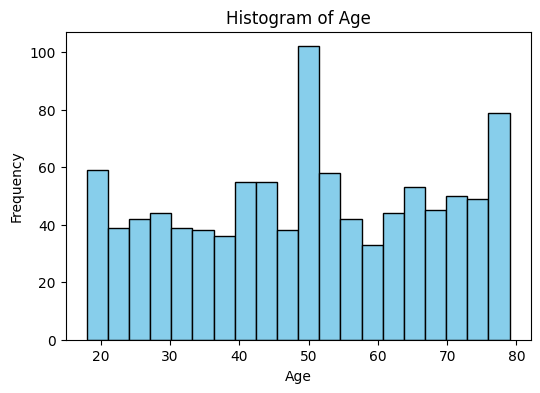

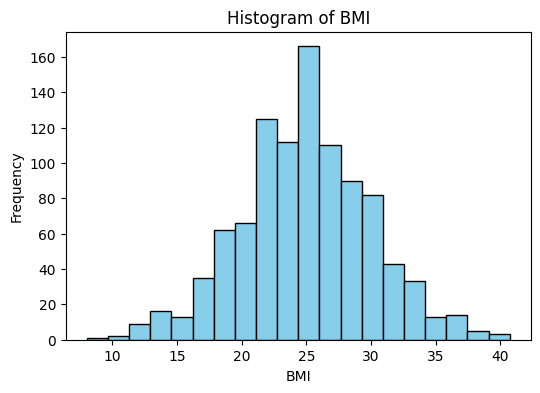

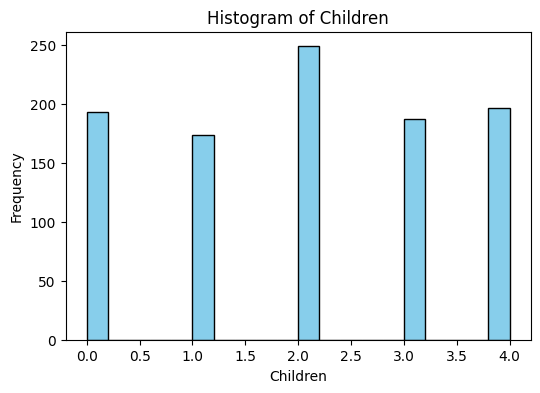

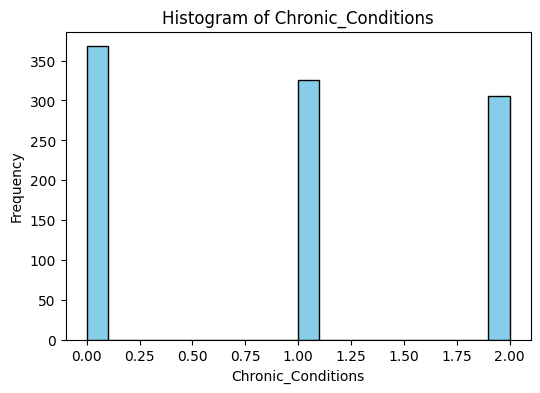

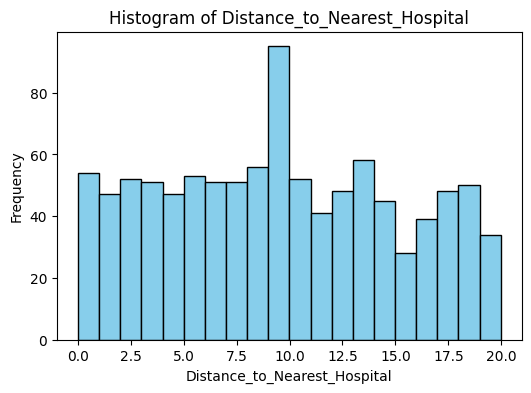

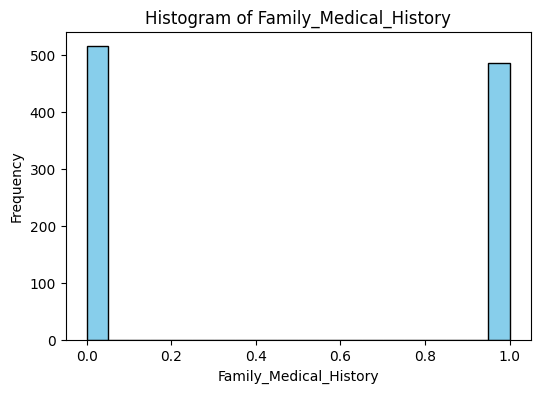

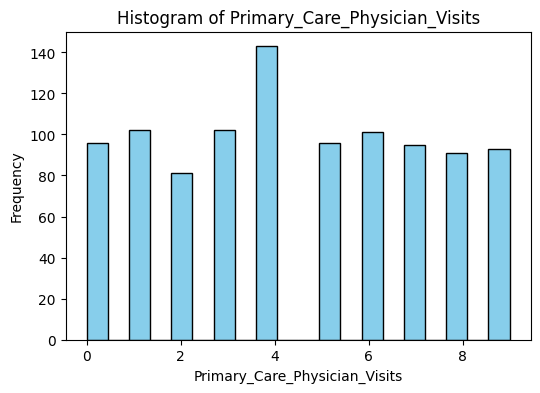

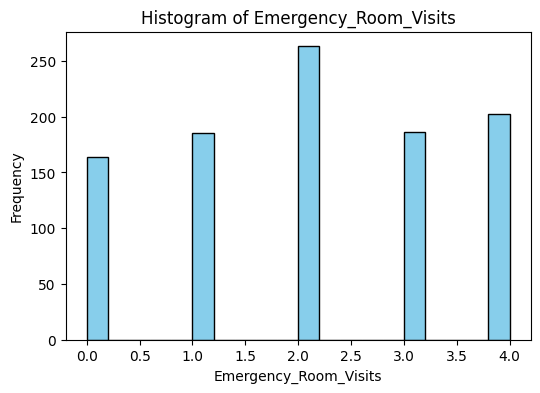

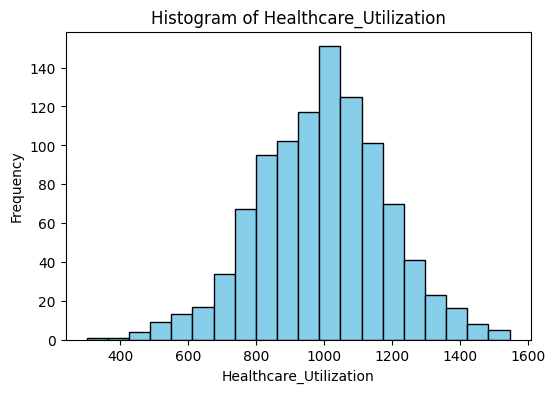

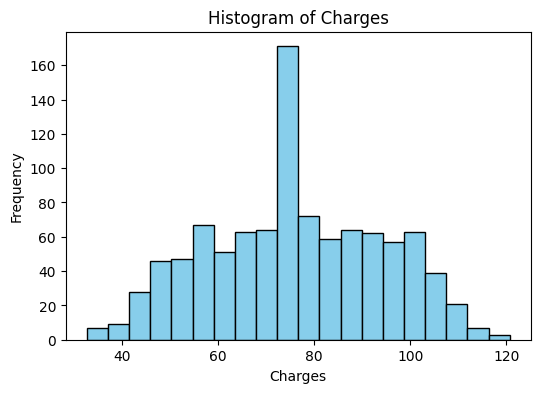

In [16]:
## distibution of numerical columns:
# Histogram
for column in numerical.columns:
  plt.figure(figsize=(6, 4))
  plt.hist(numerical[column], bins=20, color='skyblue', edgecolor='black')
  plt.title('Histogram of ' + column)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


Insights:

Almost normal distribution for Charges,BMI,Healthcare_Utilization

**OUTLIER DETECTION USING BOXPLOT**

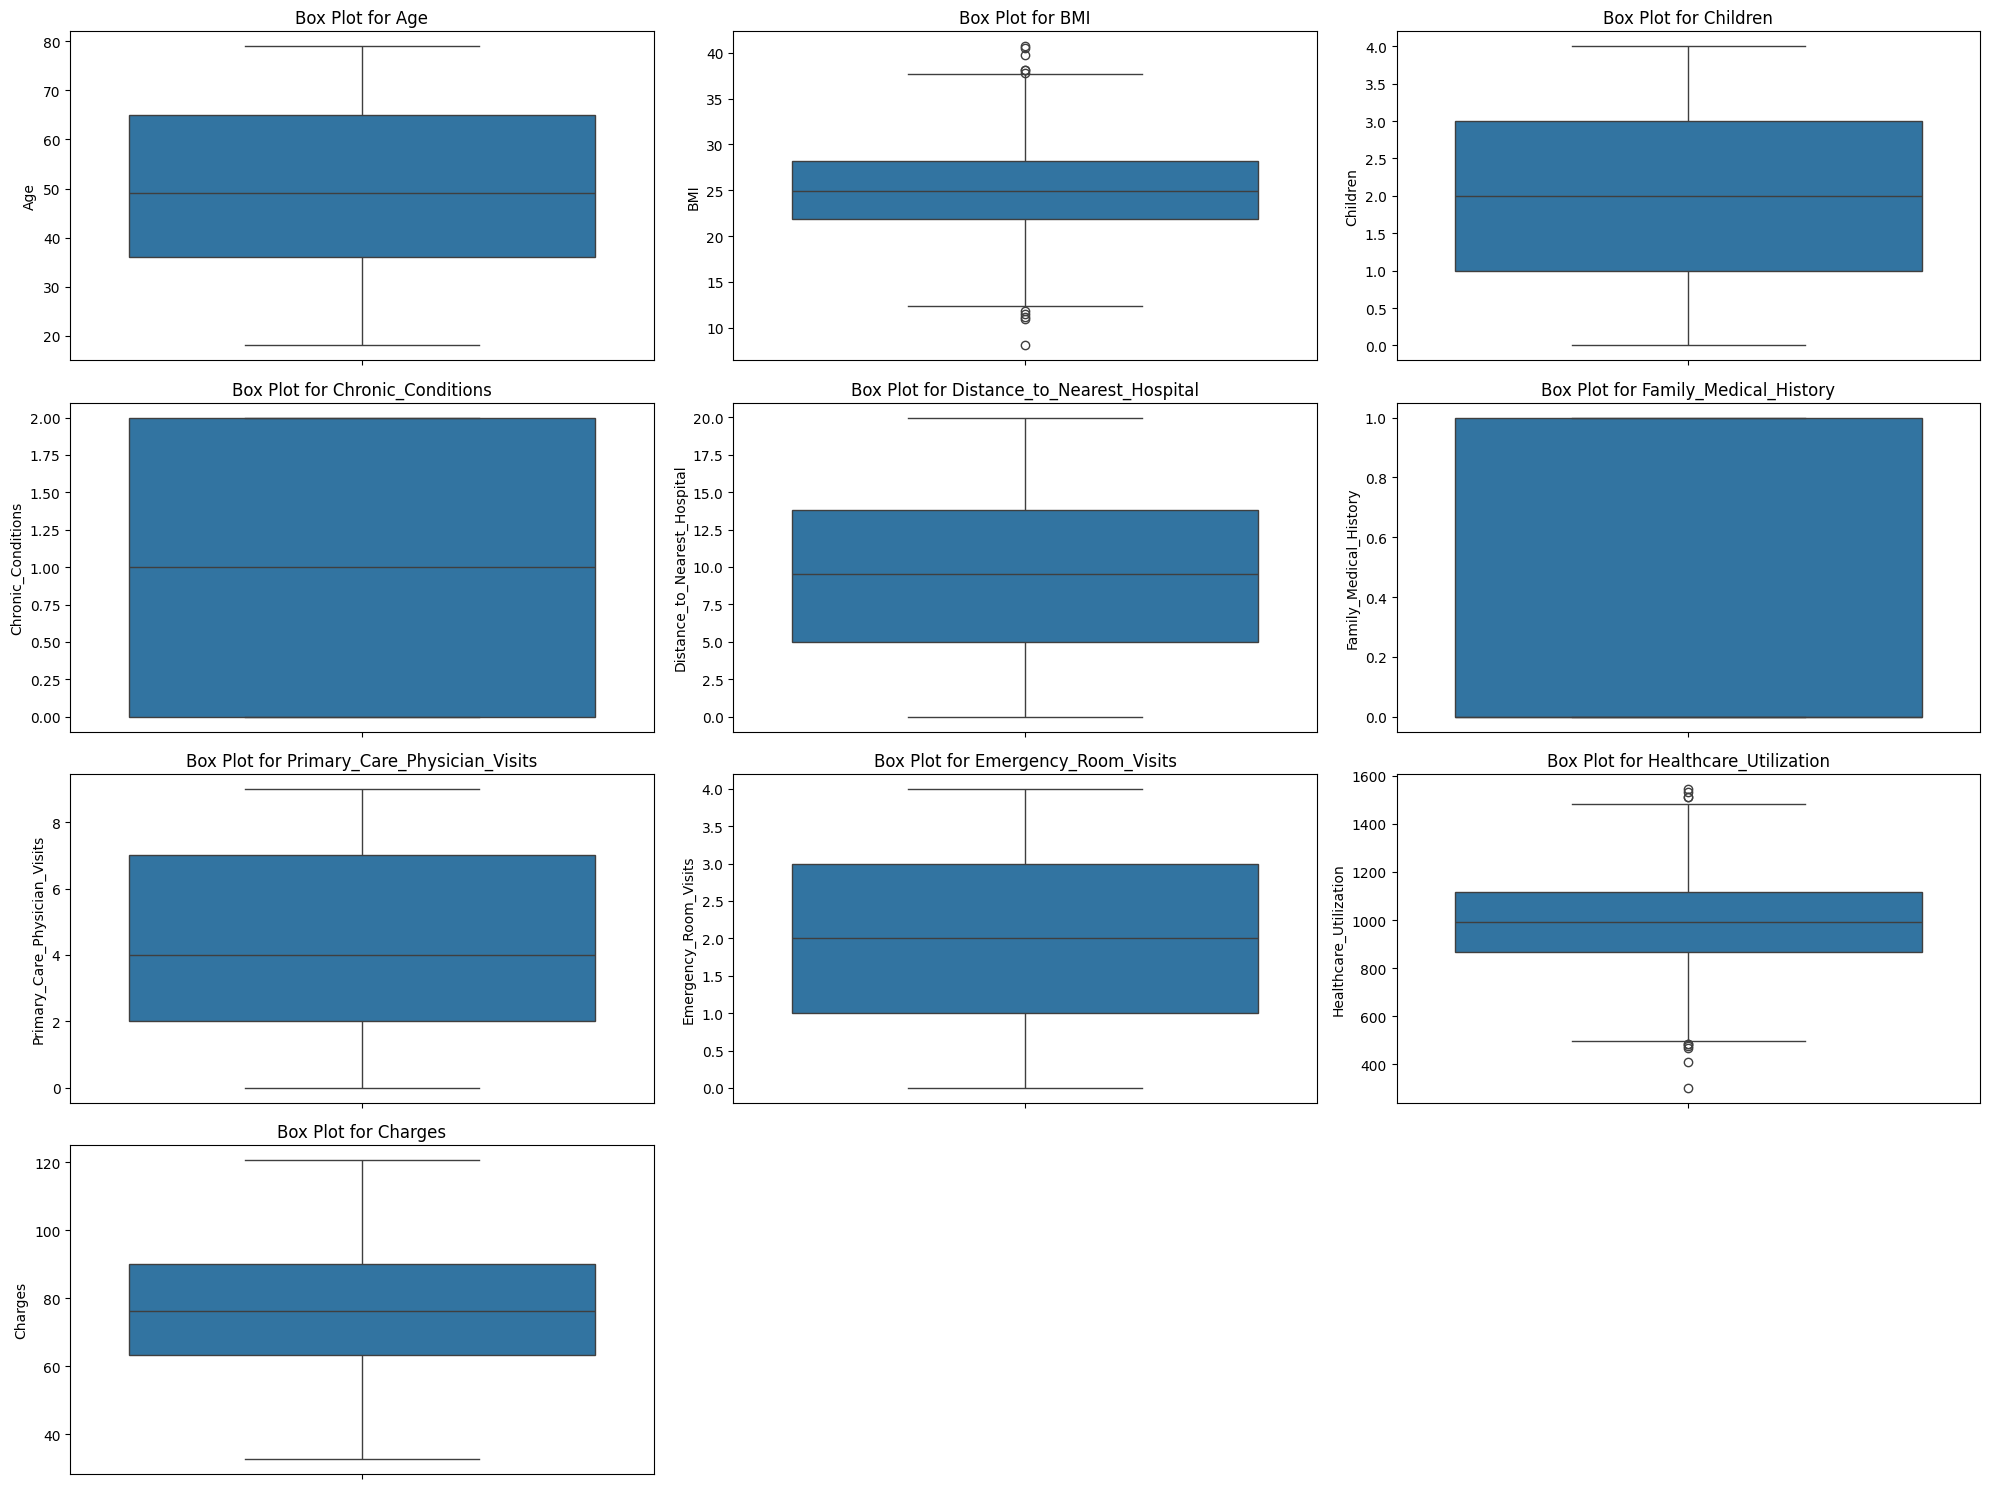

In [17]:
plt.figure(figsize=(20,15))
num_cols = len(numerical.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate number of rows needed

for i, column in enumerate(numerical.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=column, data=numerical)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


Insights:

There are outliers in BMI and HealthCare_Utilization columns.

**FINDING OUTLIER VALUES IN NUMERICAL COLUMNS**

In [18]:
## Finding the outlier values in numerical columns using IQR(Inter Quartile Range)
def detect_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers


# Detect outliers for each numerical column
outliers_dict = {}
for column in numerical.columns:
    outliers = detect_outliers_iqr(numerical,column)
    outliers_dict[column] = outliers

# Print outliers in each column
for column, outliers in outliers_dict.items():
    print("Outliers in", column, ":", outliers.tolist())



Outliers in Age : []
Outliers in BMI : [11.43755, 11.76374, 37.82029, 40.47025, 39.73106, 40.70983, 38.14606, 8.05786, 38.12543, 10.96891, 11.20201]
Outliers in Children : []
Outliers in Chronic_Conditions : []
Outliers in Distance_to_Nearest_Hospital : []
Outliers in Family_Medical_History : []
Outliers in Primary_Care_Physician_Visits : []
Outliers in Emergency_Room_Visits : []
Outliers in Healthcare_Utilization : [408.4949, 486.3093, 1531.999, 302.044, 1509.468, 484.0518, 1512.7, 476.1337, 1545.466, 467.0529]
Outliers in Charges : []


**REPLACING OUTLIERS IN BMI COLUMN WITH MEDIAN**

In [19]:


# Calculate the median of the BMI column
median_bmi = numerical['BMI'].median()

# Replace outlier values in the BMI column with the median
numerical.loc[numerical['BMI'] < 13, 'BMI'] = median_bmi
numerical.loc[numerical['BMI'] > 37, 'BMI'] = median_bmi


The median value is chosen as a robust measure of central tendency that is less sensitive to extreme values compared to the mean.

Using the median helps mitigate the influence of outliers while preserving the overall distribution and characteristics of the BMI data.

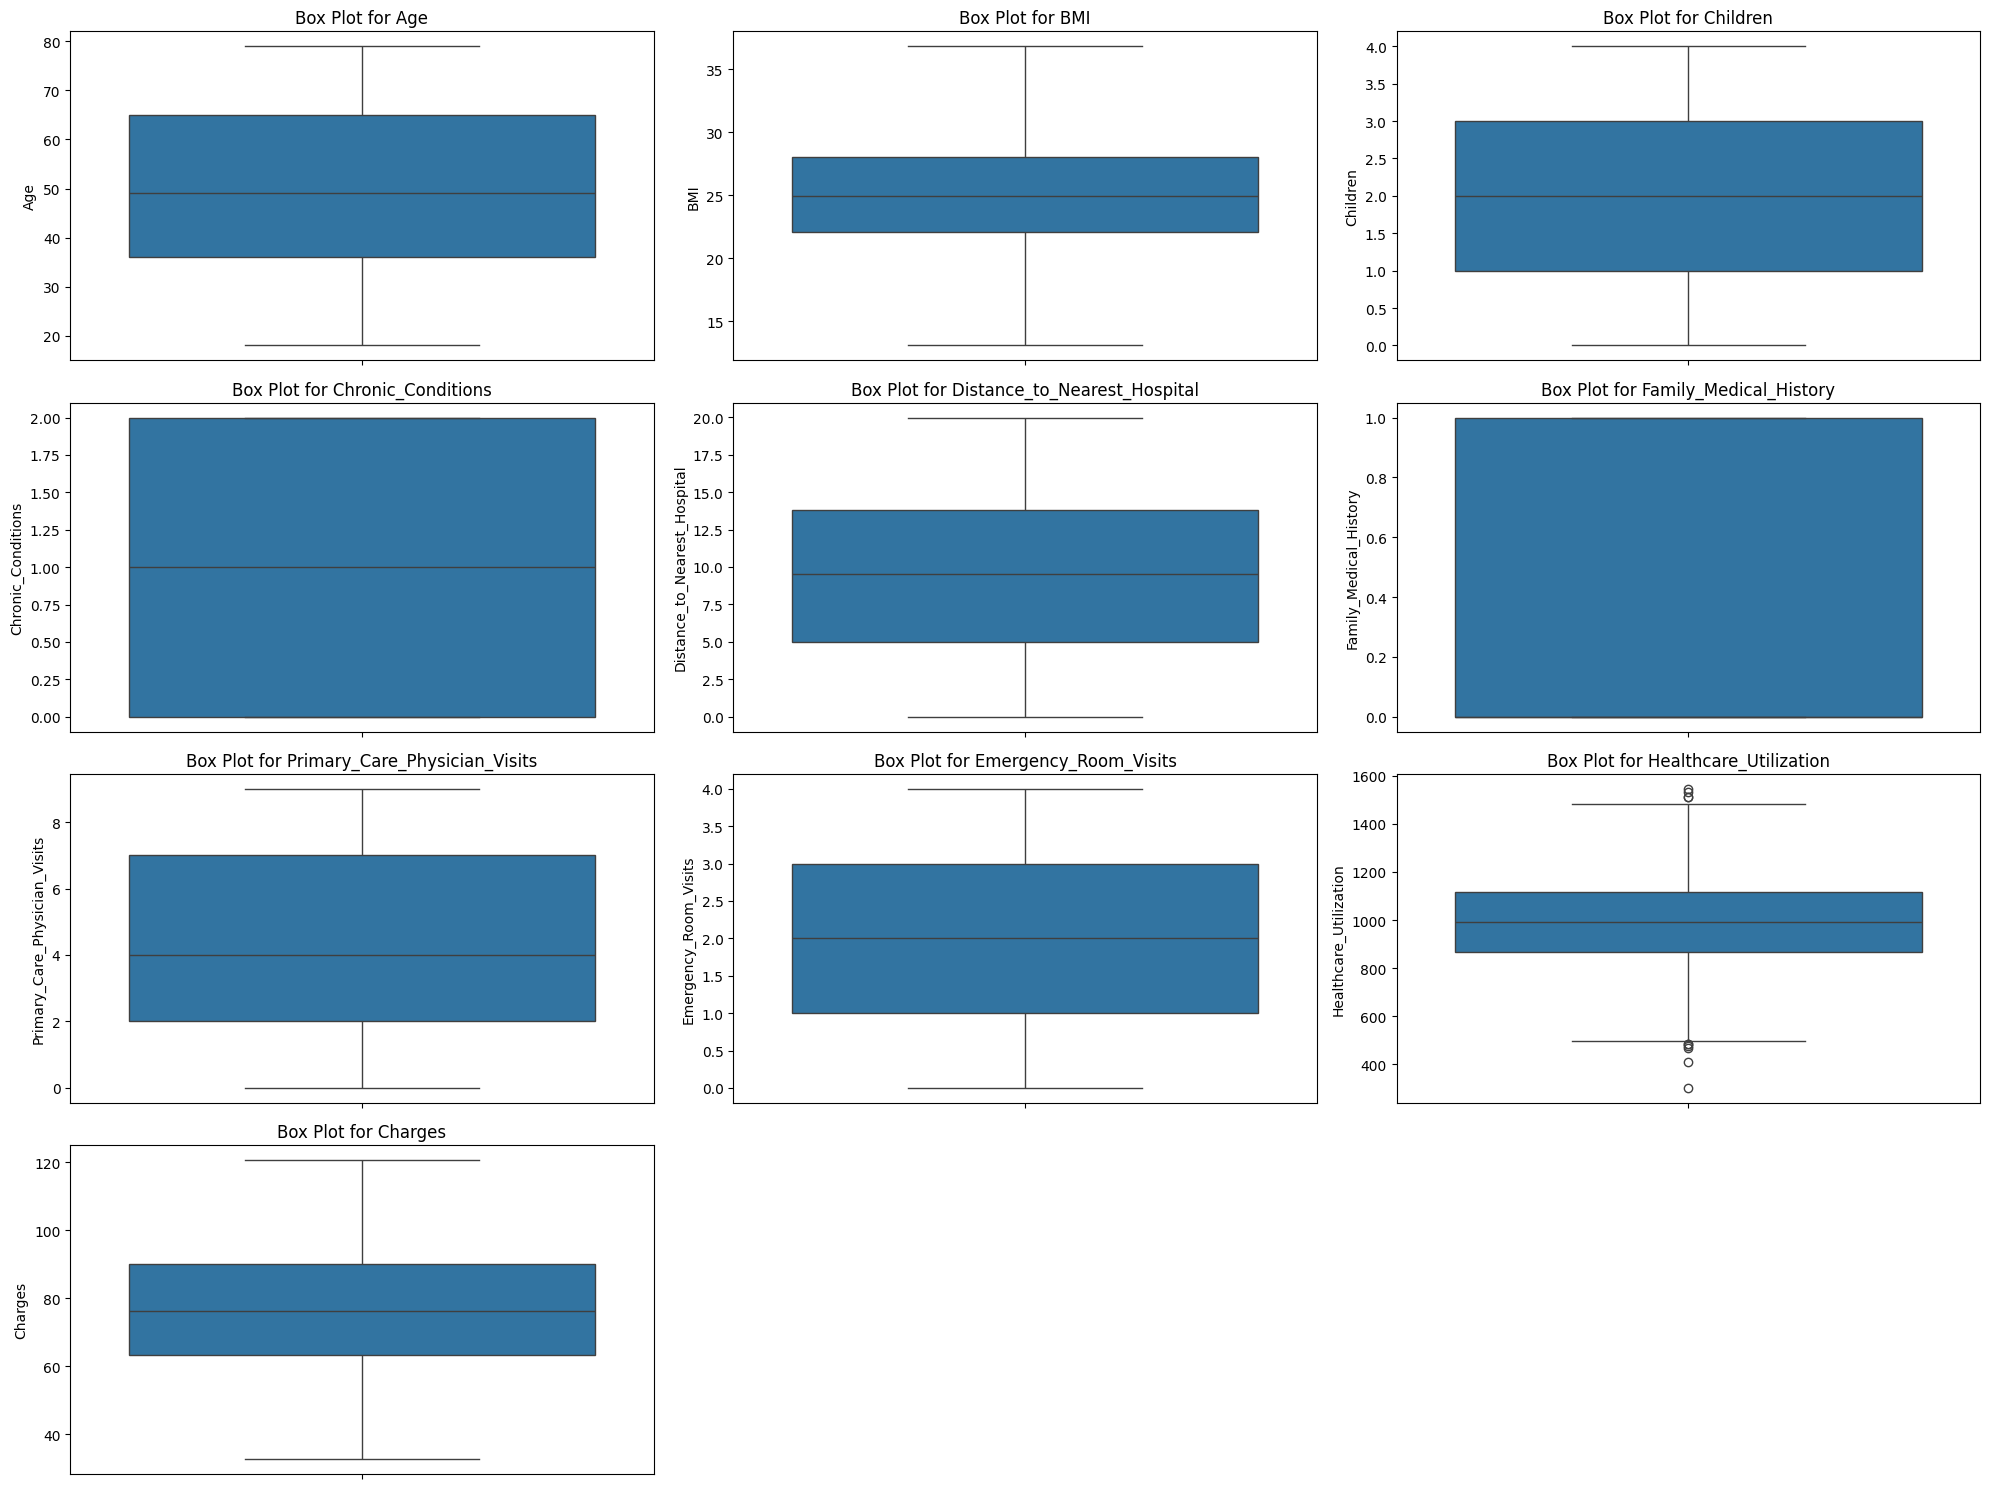

In [20]:
## Checking for outliers in Bmi column after replacing outliers with median values.
plt.figure(figsize=(20,15))
num_cols = len(numerical.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate number of rows needed

for i, column in enumerate(numerical.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=column, data=numerical)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


In [21]:
##dealing with Categorical Columns:
categorical=df.select_dtypes(include="object")
categorical.columns

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')

In [22]:
## checking null values in categorical columns:
categorical.isna().sum()

Sex                               50
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Insurance_Plan_Type               49
Marital_Status                    47
Income_Level                      50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
Environmental_Factors             49
Genetic_Predisposition            47
Health_Literacy_Level             50
Comorbidities                     48
Access_to_Telemedicine            50
dtype: int64

In [ ]:

## checking for Nan,nan,None,Vacant Spaces in our categorical columns:

def spot_missing_values(df):
    missing_values = {'NaN': 0, 'None': 0, 'nan': 0, 'Vacant Space': 0}

    for column in df.columns:
        for value in df[column]:
            if pd.isnull(value):
                missing_values['NaN'] += 1
            elif value == 'None':
                missing_values['None'] += 1
            elif isinstance(value, str) and value.lower() == 'nan':
                missing_values['nan'] += 1
            elif pd.isnull(value):
                missing_values['Vacant Space'] += 1

    return missing_values

# Spot missing values in the DataFrame
missing_values_counts = spot_missing_values(categorical)

# Report if any missing values are found
if any(count > 0 for count in missing_values_counts.values()):
    print("Missing values spotted:")
    for value_type, count in missing_values_counts.items():
        if count > 0:
            print(f"{value_type}: {count}")
else:
    print("No missing values spotted.")


Missing values spotted:
NaN: 1518


There are 1518 null values in my categorical columns.

**REPLACING NULL VALUES IN CATEGORICAL COLUMNS WITH MODE VALUES**

In [23]:
##dealing with null values in categorical columns


for column in categorical.columns:
  mode_value = categorical[column].mode()[0]
  categorical[column].fillna(mode_value, inplace=True)


In [ ]:
categorical.isna().sum()

Sex                              0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Insurance_Plan_Type              0
Marital_Status                   0
Income_Level                     0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predisposition           0
Health_Literacy_Level            0
Comorbidities                    0
Access_to_Telemedicine           0
dtype: int64

**DATA VISUALISATIONS**

<Axes: xlabel='Age', ylabel='Charges'>

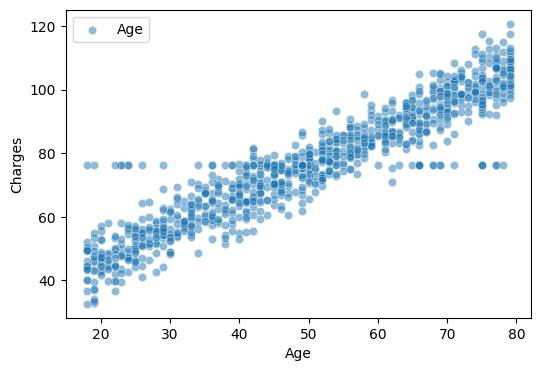

In [ ]:
##plotting scatterpot between Age and Charges
# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numerical, x='Age', y='Charges', label='Age', alpha=0.5)

Insights:

There is a strong positive Correlation between Age and Charges.

<Axes: xlabel='BMI', ylabel='Charges'>

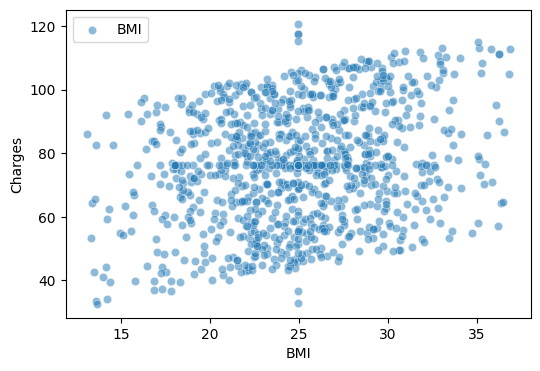

In [ ]:
##plotting scatterpot between Age and BMI
# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numerical, x='BMI', y='Charges', label='BMI', alpha=0.5)

There is a positive correation between BMI and Charges.

<Axes: xlabel='Distance_to_Nearest_Hospital', ylabel='Charges'>

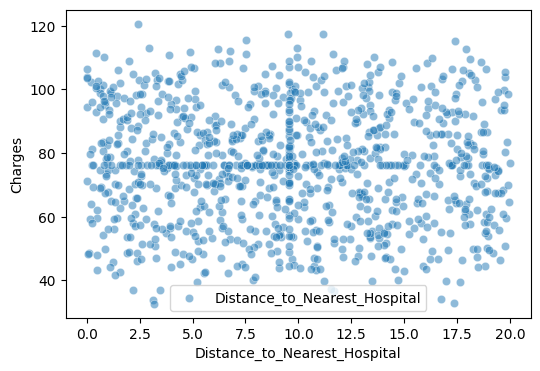

In [ ]:
##plotting scatterpot between Age and Distance_to_Nearest_Hospital
# Create a scatter plot using Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numerical, x='Distance_to_Nearest_Hospital', y='Charges', label='Distance_to_Nearest_Hospital', alpha=0.5)

Insights:

There is no  linear correlation between Charges and Distance_to_Nearest_Hospital.

**CHARGES BY SEX AND SMOKER**

<img src="https://github.com/SruthyThomas/medical-insurance-cost-prediction-project/blob/main/sex%20and%20smoker%20new.PNG?raw=true" alt="Sex and Smoker By Charges" width= 400>

Insights:

Most of our patients are Male.

Higher charges for smokers: The graph likely shows that smokers tend to have higher total charges compared to non-smokers.


**CHARGES BY REGION AND INSURANCE PLAN TYPE**

<img src="https://github.com/SruthyThomas/medical-insurance-cost-prediction-project/blob/main/region%20and%20insurance%20type.PNG?raw=true" alt="region and insurance" width=400>

Insights:

It appears most patients are from the East region,Among all the regions, patients in the East seem to have the most charges overall.

Bronze appears to be the most common insurance plan type used by patients across all regions.

**CHARGES BY EXCERCISE FREQUENCY AND DIETRY HABITS**

<img src="https://github.com/SruthyThomas/medical-insurance-cost-prediction-project/blob/main/excerscise%20frequently%20and%20dietry%20habits.PNG?raw=true" alt="Charges by excerscise frequently and dietry habits" width=500>

Insights:

For all exercise frequencies, healthy patients tend to have significantly lower total charges compared to unhealthy patients. This is likely because unhealthy patients require more medical care and treatment.

**CHARGES BY MENTAL HEALTH**

<img src="https://github.com/SruthyThomas/medical-insurance-cost-prediction-project/blob/main/mental%20health%20and%20charges.PNG?raw=true" alt="Mental health" width=500>

Insights:

In general, patients with Fairer mental health seem to have higher total charges.

**HEALTH LITERACY IN DIFFERENT REGIONS**

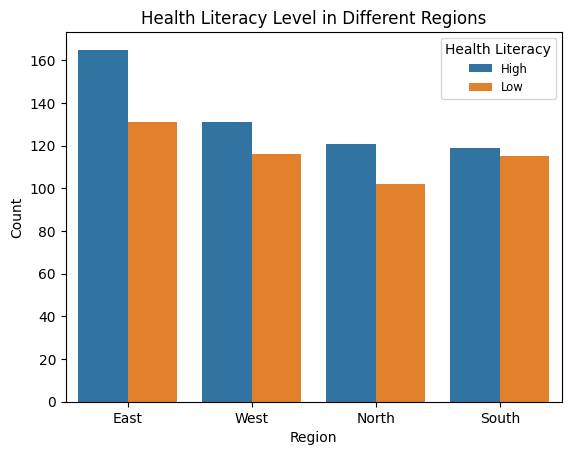

In [ ]:

sns.countplot(data=categorical, x='Region', hue='Health_Literacy_Level')
plt.title('Health Literacy Level in Different Regions')
plt.xlabel('Region')
plt.ylabel('Count')

plt.legend(title='Health Literacy', fontsize='small')
plt.show()

Insights:

A large number of patients across all regions lack health literacy.

Hospital ABC can Implement targeted health education programs.These programs can focus on improving health literacy by providing easily understandable information about common health conditions, preventive measures, and available healthcare services.

Community Outreach Initiatives: Engage with local communities in the these regions through outreach initiatives. This can involve collaborating with community organizations, hosting health fairs, and conducting workshops to raise awareness about health literacy and promote healthy behaviors.


**HEALTHCARE ACCESS IN DIFFERENT REGIONS**

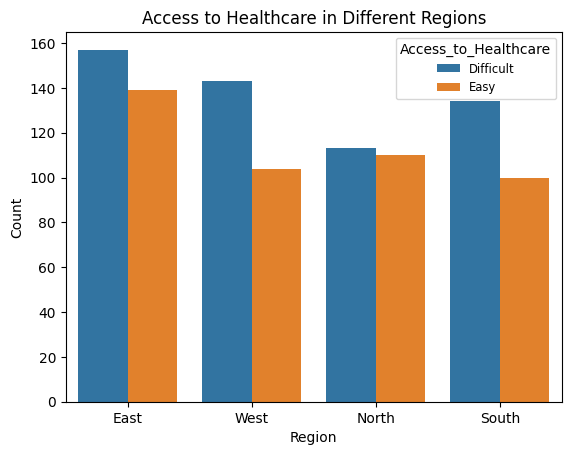

In [ ]:

sns.countplot(data=categorical, x='Region', hue='Access_to_Healthcare')
plt.title('Access to Healthcare in Different Regions')
plt.xlabel('Region')
plt.ylabel('Count')

plt.legend(title='Access_to_Healthcare', fontsize='small')
plt.show()

Insights:

Access to Healthcare is difficult across different regions.

Hospital ABC can  Implement mobile healthcare services to reach underserved areas with limited access to healthcare facilities. Mobile clinics equipped with medical staff, diagnostic equipment, and basic treatment capabilities can provide essential healthcare services directly to communities in need.




**CHARGES BY INCOME LEVEL**

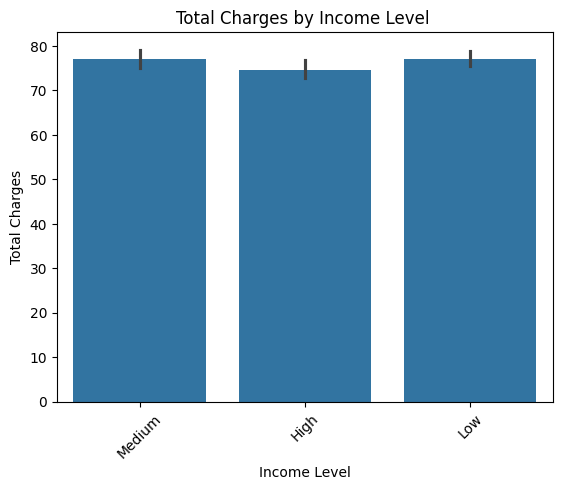

In [ ]:


# Assuming 'merged_df' is your DataFrame containing the merged data
merged_df = pd.merge(categorical, numerical, left_index=True, right_index=True)
# Plot the bar chart

sns.barplot(data=merged_df, x='Income_Level', y='Charges')
plt.title('Total Charges by Income Level ')
plt.xlabel('Income Level')
plt.ylabel('Total Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Insights:

The bar chart shows that patients from Medium, High, and Low income levels all pay about the same total amount for charges. The exact amount they pay can vary a bit, but not by much. So, no matter if someone earns more or less, they seem to pay around the same total amount in charges.


**CHARGES BY CHRONIC_CONDITIONS**

<img src="https://github.com/SruthyThomas/medical-insurance-cost-prediction-project/blob/main/charges%20by%20ChronicConditions.PNG?raw=true" alt="Charges by Chronic Conditions" width=500>

Insights:

From the above figure,we get to know that most of our patients do not have any chronic conditions,some of them have one chronic condition,some of them have more than one chronic condition.

We couldnot find any discernable relationship between Chronic_Conditions and Charges.



In [24]:
categorical.columns

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')

In [41]:
categorical.Employment_Status.value_counts()

Employment_Status
Employed         373
Self-Employed    319
Unemployed       308
Name: count, dtype: int64

**ENCODING CATEGORICAL COLUMNS USING LABEL ENCODER**

In [42]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'categorical' is your DataFrame containing categorical columns
encoder = LabelEncoder()

# List of categorical columns
columns = ['Sex', 'Smoker', 'Prescription_Medication_Usage', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare', 'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition', 'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine','Education_Level','Sleep_Quality','Stress_Level', 'Mental_Health_Status','Income_Level']

# Apply label encoding to each categorical column
for col in columns:
    categorical[col] = encoder.fit_transform(categorical[col])


In [43]:


# Assuming 'categorical' is your DataFrame containing the columns
columns_to_encode = ['Region', 'Occupation', 'Exercise_Frequency', 'Insurance_Plan_Type', 'Marital_Status', 'Employment_Status', 'Dietary_Habits', 'Alcohol_Consumption']

# Perform one-hot encoding for specified columns
categorical = pd.get_dummies(categorical, columns=columns_to_encode)


**FEATURE SCALING FEATURES USING STANDARD SCALER**

In [45]:

# Initialize StandardScaler
scaling = StandardScaler()
columns=['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization']

# Apply scaling transformation to numerical columns
numerical[columns] = scaling.fit_transform(numerical[columns])


In [46]:
numerical

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,0.352758,0.397162,-1.458319,1.297288,0.484349,-0.970437,0.551904,1.421883,-0.094257,84.787630
1,1.090391,-0.630320,1.428012,1.297288,0.318703,-0.970437,-0.879754,-0.056934,0.292895,92.063650
2,-0.214651,-0.201305,-0.015153,0.075736,0.856164,1.030464,1.625647,-0.056934,-0.837963,71.036100
3,-1.009024,-0.159170,-0.015153,1.297288,1.660801,-0.970437,-0.879754,-1.535752,-0.353321,58.229820
4,0.579722,1.483951,-1.458319,-1.145816,1.568972,1.030464,-0.879754,-0.056934,1.430319,91.784280
...,...,...,...,...,...,...,...,...,...,...
995,-1.803397,-1.558910,-1.458319,0.075736,-1.094765,-0.970437,-0.879754,-0.056934,-0.325789,36.794340
996,-0.838801,-0.527095,-0.736736,0.075736,1.022347,1.030464,-0.879754,1.421883,1.534206,58.538240
997,-0.044428,-1.452085,1.428012,1.297288,-1.665483,-0.970437,-0.521839,-0.796343,1.835798,69.285480
998,0.806686,-0.623260,-0.015153,-1.145816,0.290063,1.030464,1.267733,-1.535752,-1.143146,88.096110


In [47]:
# Initialize StandardScaler
scaling = StandardScaler()

# Apply scaling transformation to categorical columns
categorical[categorical.columns] = scaling.fit_transform(categorical[categorical.columns])


In [48]:
categorical

,Sex,Smoker,Income_Level,Mental_Health_Status,Prescription_Medication_Usage,Education_Level,Sleep_Quality,Stress_Level,Medication_Adherence,Physical_Activity,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate
0,0.911867,-0.953099,1.312005,0.104017,1.064047,-0.070302,-0.919249,-1.253365,-1.070478,-1.070478,...,-0.646869,1.280048,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,-1.505979,1.505979
1,0.911867,1.049209,-1.228179,-1.119711,-0.939808,-0.070302,-0.919249,1.278686,-1.070478,0.934162,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,1.057660,-1.057660,-1.505979,1.505979
2,-1.096651,1.049209,1.312005,-1.119711,-0.939808,-1.282414,-0.919249,-1.253365,0.934162,0.934162,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,1.057660,-1.057660,-1.505979,1.505979
3,0.911867,-0.953099,-1.228179,0.104017,-0.939808,-0.070302,-0.919249,-1.253365,0.934162,0.934162,...,-0.646869,1.280048,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,-1.505979,1.505979
4,0.911867,-0.953099,0.041913,-1.119711,1.064047,-1.282414,1.087845,1.278686,0.934162,0.934162,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,-0.945484,0.945484,0.664020,-0.664020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.911867,1.049209,-1.228179,1.327745,1.064047,-0.070302,1.087845,0.012660,0.934162,0.934162,...,1.545908,-0.781221,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,0.664020,-0.664020
996,-1.096651,1.049209,0.041913,0.104017,-0.939808,-0.070302,-0.919249,0.012660,-1.070478,-1.070478,...,-0.646869,-0.781221,1.437875,-0.771295,-0.684419,1.498917,1.057660,-1.057660,-1.505979,1.505979
997,0.911867,-0.953099,1.312005,-1.119711,-0.939808,-0.070302,-0.919249,-1.253365,-1.070478,0.934162,...,-0.646869,1.280048,-0.695471,1.296520,-0.684419,-0.667148,1.057660,-1.057660,0.664020,-0.664020
998,0.911867,-0.953099,0.041913,1.327745,-0.939808,-0.070302,-0.919249,-1.253365,0.934162,-1.070478,...,-0.646869,1.280048,-0.695471,-0.771295,-0.684419,1.498917,-0.945484,0.945484,-1.505979,1.505979


In [49]:
## concatenating numerical and categorical features  to a new dataframe
df_new=pd.concat([numerical,categorical],axis=1)
df_new

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate
0,0.352758,0.397162,-1.458319,1.297288,0.484349,-0.970437,0.551904,1.421883,-0.094257,84.787630,...,-0.646869,1.280048,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,-1.505979,1.505979
1,1.090391,-0.630320,1.428012,1.297288,0.318703,-0.970437,-0.879754,-0.056934,0.292895,92.063650,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,1.057660,-1.057660,-1.505979,1.505979
2,-0.214651,-0.201305,-0.015153,0.075736,0.856164,1.030464,1.625647,-0.056934,-0.837963,71.036100,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,1.057660,-1.057660,-1.505979,1.505979
3,-1.009024,-0.159170,-0.015153,1.297288,1.660801,-0.970437,-0.879754,-1.535752,-0.353321,58.229820,...,-0.646869,1.280048,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,-1.505979,1.505979
4,0.579722,1.483951,-1.458319,-1.145816,1.568972,1.030464,-0.879754,-0.056934,1.430319,91.784280,...,-0.646869,-0.781221,1.437875,-0.771295,1.461094,-0.667148,-0.945484,0.945484,0.664020,-0.664020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.803397,-1.558910,-1.458319,0.075736,-1.094765,-0.970437,-0.879754,-0.056934,-0.325789,36.794340,...,1.545908,-0.781221,-0.695471,-0.771295,1.461094,-0.667148,-0.945484,0.945484,0.664020,-0.664020
996,-0.838801,-0.527095,-0.736736,0.075736,1.022347,1.030464,-0.879754,1.421883,1.534206,58.538240,...,-0.646869,-0.781221,1.437875,-0.771295,-0.684419,1.498917,1.057660,-1.057660,-1.505979,1.505979
997,-0.044428,-1.452085,1.428012,1.297288,-1.665483,-0.970437,-0.521839,-0.796343,1.835798,69.285480,...,-0.646869,1.280048,-0.695471,1.296520,-0.684419,-0.667148,1.057660,-1.057660,0.664020,-0.664020
998,0.806686,-0.623260,-0.015153,-1.145816,0.290063,1.030464,1.267733,-1.535752,-1.143146,88.096110,...,-0.646869,1.280048,-0.695471,-0.771295,-0.684419,1.498917,-0.945484,0.945484,-1.505979,1.505979


**CORRELATION MATRIX**

In machine learning, a correlation matrix is a table showing correlation coefficients between variables.

In [50]:
df_new.corr()


,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Employment_Status_Employed,Employment_Status_Self-Employed,Employment_Status_Unemployed,Dietary_Habits_Healthy,Dietary_Habits_Unhealthy,Alcohol_Consumption_Heavy,Alcohol_Consumption_Moderate
Age,1.000000,0.011112,0.026267,-0.047025,-0.025621,-0.048110,0.047834,-0.020990,0.031243,0.937125,...,0.003983,-0.025702,0.022726,0.008323,-0.056581,0.048404,-0.065534,0.065534,0.035165,-0.035165
BMI,0.011112,1.000000,-0.004516,0.045282,-0.027260,-0.014569,0.040663,0.055937,-0.003137,0.253861,...,0.014910,0.005270,-0.019960,-0.042605,0.027445,0.016922,0.013278,-0.013278,0.020085,-0.020085
Children,0.026267,-0.004516,1.000000,-0.023533,0.006171,0.032941,-0.000160,0.049290,0.006166,0.021963,...,-0.033536,-0.029687,0.063352,0.001741,-0.007275,0.005521,0.011691,-0.011691,-0.018123,0.018123
Chronic_Conditions,-0.047025,0.045282,-0.023533,1.000000,0.011601,0.014836,-0.020376,-0.003817,0.010881,-0.028309,...,-0.001902,-0.001264,0.003158,0.007896,-0.024170,0.016130,0.003093,-0.003093,-0.071496,0.071496
Distance_to_Nearest_Hospital,-0.025621,-0.027260,0.006171,0.011601,1.000000,-0.016918,-0.037077,-0.013179,0.006709,-0.034345,...,-0.016484,-0.000513,0.016569,-0.044582,0.044829,0.001442,0.013251,-0.013251,0.040138,-0.040138
Family_Medical_History,-0.048110,-0.014569,0.032941,0.014836,-0.016918,1.000000,-0.033036,0.040915,0.000461,-0.049273,...,-0.044204,-0.044605,0.089171,-0.028569,-0.020241,0.050362,0.060442,-0.060442,-0.019930,0.019930
Primary_Care_Physician_Visits,0.047834,0.040663,-0.000160,-0.020376,-0.037077,-0.033036,1.000000,-0.008804,-0.076541,0.062897,...,0.025028,-0.011496,-0.012452,-0.028741,0.013744,0.016231,0.036438,-0.036438,-0.044932,0.044932
Emergency_Room_Visits,-0.020990,0.055937,0.049290,-0.003817,-0.013179,0.040915,-0.008804,1.000000,0.022975,-0.012342,...,0.016676,-0.020092,0.004571,-0.010276,-0.023103,0.034089,-0.007915,0.007915,-0.008725,0.008725
Healthcare_Utilization,0.031243,-0.003137,0.006166,0.010881,0.006709,0.000461,-0.076541,0.022975,1.000000,0.034716,...,0.031797,-0.026196,-0.003823,0.034275,-0.060793,0.025473,-0.009191,0.009191,0.047884,-0.047884
Charges,0.937125,0.253861,0.021963,-0.028309,-0.034345,-0.049273,0.062897,-0.012342,0.034716,1.000000,...,0.002501,-0.019840,0.018101,0.006392,-0.064623,0.058547,-0.045685,0.045685,0.016401,-0.016401


Insights:

 Age and Charges:There is a strong positive correlation between Age and Medical Charges,that means as the Age increases,Medical Charges also increases.

 Primary_Care_Physician_Visits and Charges:There is a small positive correlation,indicating frequent physician  visits increases medical charges.

 BMI and Charges: There is a slight positive correlation between BMI and Charges.


**FEATURE SELECTION USING RANDOM FOREST REGRESSOR**

Feature selection is the process of selecting a subset of relevant features for use in model construction.

In [51]:

# feature selection :
X=df_new.drop(columns="Charges")
y=df_new["Charges"]
# Initialize Random Forest Regressor
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked features
print("Feature Importance Ranking:")
print(feature_importance_df)


Feature Importance Ranking:
                            Feature  Importance
0                               Age    0.886489
1                               BMI    0.085860
8            Healthcare_Utilization    0.004404
4      Distance_to_Nearest_Hospital    0.004030
6     Primary_Care_Physician_Visits    0.002407
7             Emergency_Room_Visits    0.001469
2                          Children    0.000988
20                   Social_Support    0.000857
3                Chronic_Conditions    0.000606
39       Insurance_Plan_Type_Silver    0.000590
31                 Occupation_Other    0.000533
34       Exercise_Frequency_Monthly    0.000500
16                     Stress_Level    0.000440
11                     Income_Level    0.000425
12             Mental_Health_Status    0.000424
5            Family_Medical_History    0.000421
10                           Smoker    0.000412
32          Occupation_White Collar    0.000408
43       Employment_Status_Employed    0.000404
37       Ins

In [52]:
# Set the desired percentile threshold (e.g., top 45%)
percentile_threshold = 45

# Calculate the threshold value based on the percentile
importance_threshold = np.percentile(feature_importance_df['Importance'], 100 - percentile_threshold)

# Select features with importance greater than the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

# Print selected features
print("Selected Features (Top", percentile_threshold, "Percentile):")
print(selected_features)


Selected Features (Top 45 Percentile):
['Age', 'BMI', 'Healthcare_Utilization', 'Distance_to_Nearest_Hospital', 'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Children', 'Social_Support', 'Chronic_Conditions', 'Insurance_Plan_Type_Silver', 'Occupation_Other', 'Exercise_Frequency_Monthly', 'Stress_Level', 'Income_Level', 'Mental_Health_Status', 'Family_Medical_History', 'Smoker', 'Occupation_White Collar', 'Employment_Status_Employed', 'Insurance_Plan_Type_Bronze', 'Comorbidities', 'Medication_Adherence', 'Marital_Status_Single']


**MACHINE LEARNING**

Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without explicit programming instructions. In essence, it's about teaching machines to learn from data in order to make predictions or decisions.

**MODEL TRAINING AND PREDICTING TEST DATASET**


In [54]:

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming X, y are your features and target variables respectively
X=df_new[['Age', 'BMI', 'Healthcare_Utilization', 'Distance_to_Nearest_Hospital', 'Primary_Care_Physician_Visits', 'Emergency_Room_Visits', 'Children', 'Social_Support', 'Chronic_Conditions', 'Insurance_Plan_Type_Silver', 'Occupation_Other', 'Exercise_Frequency_Monthly', 'Stress_Level', 'Income_Level', 'Mental_Health_Status', 'Family_Medical_History', 'Smoker', 'Occupation_White Collar', 'Employment_Status_Employed', 'Insurance_Plan_Type_Bronze', 'Comorbidities', 'Medication_Adherence', 'Marital_Status_Single']]
y=df_new["Charges"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of tuples containing model names and their corresponding regressors
models = [
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("AdaBoost", AdaBoostRegressor(random_state=42))
    ]

# Initialize an empty list to store results
results_list = []

# Loop over each model
for model_name, model in models:
    # Create a pipeline with the model
    pipeline = make_pipeline(model)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to list
    results_list.append({'Model': model_name, 'Mean Absolute Error': mae, 'R2 Score': r2})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print results in tabular format
print(results_df)


               Model  Mean Absolute Error  R2 Score
0      Random Forest             1.638491  0.969090
1  Linear Regression             1.801252  0.961529
2      Decision Tree             2.180744  0.931892
3            XGBoost             1.760620  0.969215
4           AdaBoost             5.005825  0.880578


Insights:

I have chosen RandomForestRegressor for predicting medical cost prediction.

**ACTUAL CHARGES VS PREDICTED CHARGES**

Mean Squared Error: 10.017030904352207
R2 Score: 0.9690904058145243


Text(0, 0.5, 'Predicted Values')

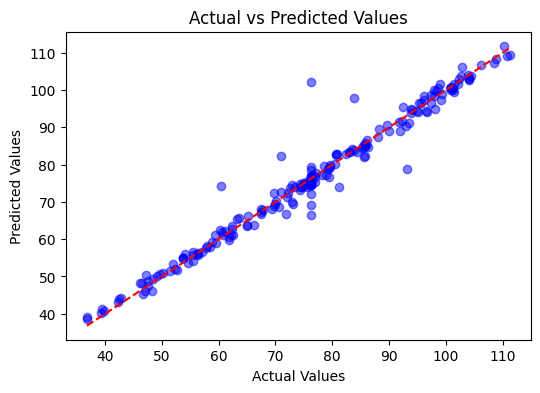

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Print evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred,color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


Insights:

This scatter plot compares the actual values with the predicted values. The closer the points are to a straight line, the better the model’s predictions.



**SAVING THE MODEL**

In [56]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(rf_regressor, 'model_filename.pkl')

['model_filename.pkl']

**CONCLUSIONS:**

1)Employed linear regression alongside ensemble methods such as Random Forest Regressor, XGBoost, AdaBoost, and Decision Trees due to the limited linear relationship observed in the data. Notably, Random Forest Regressor yielded a commendable R2 score while minimizing mean absolute error.


2)Age and BMI, along with the frequency of Primary Care Physician Visits, exhibit a positive correlation with medical charges.


3)Medical charges tend to be higher for male smokers, who comprise a significant portion of the patient population.


4)Hospital ABC can enhance its patient support services by implementing comprehensive programs specifically designed for male smokers. These initiatives should encompass counseling sessions, structured smoking cessation programs, and the distribution of educational materials focusing on fostering healthier habits and mitigating the risk of chronic diseases.

5)Patients from Medium, High, and Low income levels all pay about the same total amount for charges.

6)The East region appears to have the highest patient volume, correlating with the region's highest overall charges. Bronze insurance plans emerge as the prevailing choice among patients across all regions.

7)Across all exercise frequencies, healthy patients exhibit notably lower total charges compared to unhealthy patients, presumably due to the increased medical care and treatment required by the latter.

8)Hospital ABC can address the widespread lack of health literacy across all regions by implementing targeted health education programs. These initiatives aim to enhance understanding of common health conditions, preventive measures, and available healthcare services through easily accessible and comprehensible information.

9)Additionally, engaging with local communities through community outreach initiatives is essential. Collaborating with community organizations, hosting health fairs, and conducting workshops can effectively raise awareness about health literacy and encourage healthy behaviors among residents in these regions.

10)Hospital ABC can enhance access to healthcare in underserved regions by introducing mobile healthcare services. These mobile clinics, staffed with medical professionals and equipped with diagnostic tools and basic treatment capabilities, can bridge the gap in areas with limited access to traditional healthcare facilities. This proactive approach ensures essential healthcare services are directly delivered to communities in need, thereby improving overall healthcare accessibility.